In [ ]:
#Using python to calculate the monthly return rate of orders from August 2016 through December 2016.

In [13]:
import pandas as pd
import datetime as dt

In [29]:
xls = pd.ExcelFile('casper_order.xlsx')
df = xls.parse('Orders')

In [30]:
df.head()

,dateordered,datereturned,orderstatus,orders
0,2016-12-31,2017-01-24,returned,1
1,2016-12-31,NaT,complete,8
2,2016-12-30,NaT,complete,14
3,2016-12-29,NaT,complete,14
4,2016-12-28,2016-12-29,returned,1


In [ ]:
#A preview of the dataset. The four columns show the date an order was placed, the date an order was returned, the order status (returned indicates a returned order) and the total number of orders placed/returned for that day 

In [31]:
df['monthordered'] = df['dateordered'].dt.month
df['monthreturned'] = df.datereturned.dt.month

In [ ]:
#Using the datetime library, extract the month from the dates.

In [125]:
df2 = df.groupby(['monthordered','orderstatus'], as_index = False).sum()
df2 = df2.drop('monthreturned', 1)
df2

,monthordered,orderstatus,orders
0,8,complete,139
1,8,returned,10
2,9,complete,134
3,9,returned,9
4,10,complete,170
5,10,returned,10
6,11,complete,214
7,11,returned,12
8,12,complete,376
9,12,returned,19


In [ ]:
#After the month of the orders have been extracted, group by the month and order status to sum each returns and non returned orders per month.

In [232]:
l1 = []
for row, index in df2.iterrows():
    if row == len(df2)-1:
        break
    elif index['orderstatus'] == 'returned':
        pass
    else:
        l1.append([index['monthordered'], (float(df2.iloc[row+1,2])/(df2.iloc[row,2])*100)])

In [ ]:
#Calculate the return rate of the orders by calculating the number of returned orders per month. Storing the output in a list with month, return rate.

In [233]:
l1

[[8, 7.194244604316546],
 [9, 6.7164179104477615],
 [10, 5.88235294117647],
 [11, 5.607476635514018],
 [12, 5.053191489361701]]

In [242]:
data = pd.DataFrame(l1, columns=('Month','Return Rate'))
data

,Month,Return Rate
0,8,7.194245
1,9,6.716418
2,10,5.882353
3,11,5.607477
4,12,5.053191


In [ ]:
#Convert into dataframe.

In [235]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

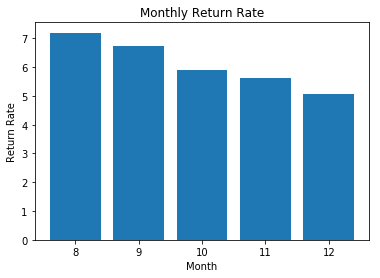

In [247]:
plt.bar(data['Month'], data['Return Rate'])
plt.title('Monthly Return Rate')
plt.xlabel('Month')
plt.ylabel('Return Rate')

In [ ]:
#Plot the output in a bar chart.